In [1]:
#matplot에 한글 표시하기 위한
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,852 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

In [2]:
!pip install sqlalchemy==1.4.46
!pip install -U pandasql
!pip install haversine
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=7619e980103fee870a1778e172ff9ca90c7de7180a3535327f974691114832bc
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime,timedelta
import time

from haversine import haversine      # 위경도간 거리를 계산해주는 라이브러리
from PIL import Image # matplot으로 이미지파일 그리기
import pickle # 데이터 불러오기
from scipy.spatial.distance import euclidean #유클리안 거리 라이브러리
from fastdtw import fastdtw # DTW


import numpy as np
from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

### 데이터 로드

In [27]:
with open( "/content/drive/MyDrive/tmTrack/상행선_보간_DataFrame.p", "rb" ) as file:
    b2t = pickle.load(file)
with open( "/content/drive/MyDrive/tmTrack/하행선_보간_DataFrame.p", "rb" ) as file:
    t2b = pickle.load(file)

###제주 -> 인천 데이터 확인

In [28]:
b2t.head()

,report_datetime,target_id,latitude,longitude,rot,sog,cog,heading,distance,time_gap,speed,seq,ahead
0,2022-09-08 20:34:00,440181090.0,33.538434,126.543025,-127.000000,143.000000,3245.500000,318.5,25.914727,3.000000,11.109462,514.0,10.0
1,2022-09-08 20:34:10,440181090.0,33.538962,126.542409,-127.000000,144.500000,3156.000000,310.0,41.005373,5.500000,10.885055,514.0,10.0
2,2022-09-08 20:34:20,440181090.0,33.539275,126.541975,-127.000000,147.000000,3124.000000,307.0,45.689355,6.000000,7.614893,514.0,10.0
3,2022-09-08 20:34:30,440181090.0,33.539726,126.541267,-127.000000,154.666667,3076.333333,305.0,34.731679,4.666667,6.851708,514.0,10.0
4,2022-09-08 20:34:40,440181090.0,33.540170,126.540500,-21.166667,160.166667,3049.333333,303.5,16.652917,2.000000,9.968686,514.0,10.0


### 인천 -> 제주 데이터 확인

In [7]:
t2b.head()

,target_id,report_datetime,latitude,longitude,rot,sog,cog,heading,ymd,ymdh,ymdhm,distance,time_gap,speed,seq,ahead
0,440181090,2022-01-03 19:22:38,37.400315,126.554322,0,122,2114,210,2022-01-03,2022-01-03 19,2022-01-03 19:22,50.041054,9,5.560117,7,-10.0
1,440181090,2022-01-03 19:22:50,37.399683,126.553845,0,122,2113,210,2022-01-03,2022-01-03 19,2022-01-03 19:22,81.892326,12,6.824360,7,-10.0
2,440181090,2022-01-03 19:22:59,37.399245,126.553517,0,122,2111,210,2022-01-03,2022-01-03 19,2022-01-03 19:22,56.717212,9,6.301912,7,-10.0
3,440181090,2022-01-03 19:23:09,37.398710,126.553112,0,122,2112,210,2022-01-03,2022-01-03 19,2022-01-03 19:23,69.418432,10,6.941843,7,-10.0
4,440181090,2022-01-03 19:23:20,37.398202,126.552728,0,127,2112,210,2022-01-03,2022-01-03 19,2022-01-03 19:23,65.891173,11,5.990107,7,-10.0


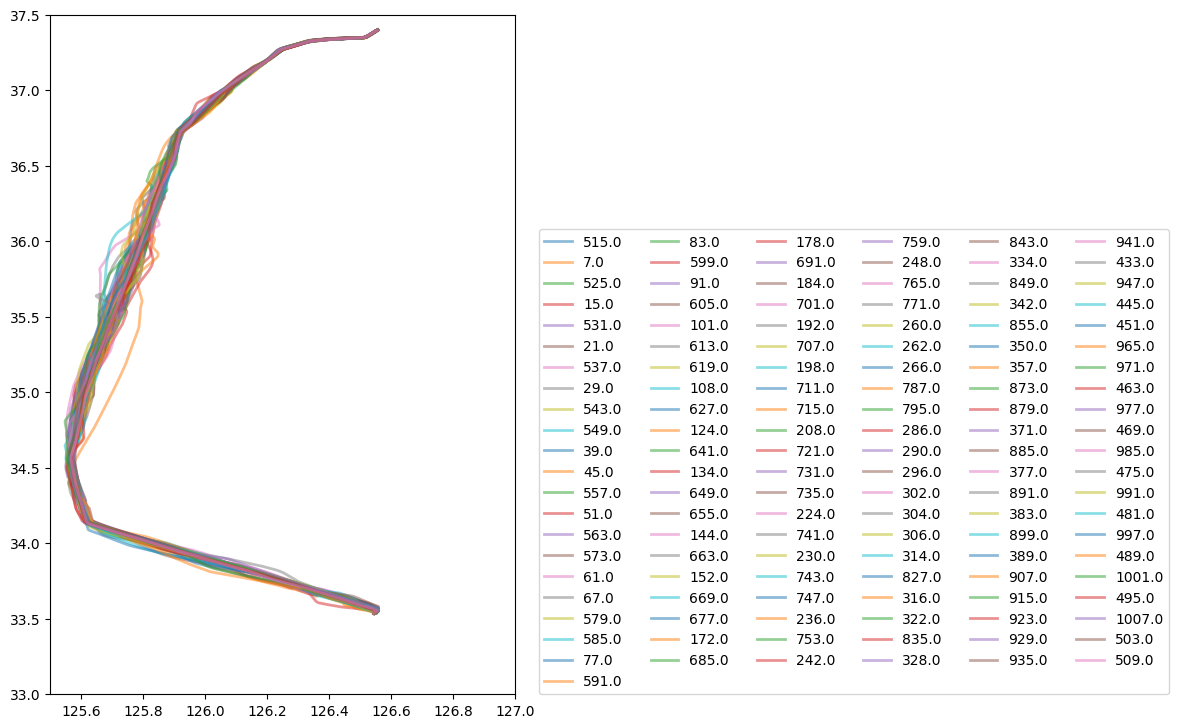

In [29]:
pfg = plt.figure(figsize=(6,30))
for seq in set(t2b.seq) :
    plt.subplot(3,1,1)
    tmTrack_seq = t2b[ t2b.seq ==seq]
    tmTrack_seq = tmTrack_seq.reset_index()
    plt.xlim([125.5, 127])
    plt.ylim([33, 37.5])
    plt.plot(tmTrack_seq['longitude'],tmTrack_seq['latitude'], label=seq, linestyle='-',  alpha=0.5, linewidth=2)
    plt.legend(loc='best')
    #pltNo += 1
plt.legend(loc=(1.05 ,0.), ncols=6)
plt.show()

In [30]:
x = t2b.loc[t2b['seq'] == 721,  ['latitude', 'longitude']].to_numpy()
y = t2b.loc[t2b['seq'] == 731,  ['latitude', 'longitude']].to_numpy()
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

64.44154818207049


In [31]:
t2b.loc[t2b['seq'] == 721,  ['latitude', 'longitude']].to_numpy()[:,1]

array([126.55458167, 126.55420833, 126.55383667, ..., 126.54490866,
       126.5449085 , 126.54490833])

####def fastdtw(x, y, radius=1, dist=None)
     return the approximate distance between 2 time series with O(N)
        time and memory complexity
        Parameters
        ----------
        x : array_like
            input array 1
        y : array_like
            input array 2
        radius : int
            size of neighborhood when expanding the path. A higher value will
            increase the accuracy of the calculation but also increase time
            and memory consumption. A radius equal to the size of x and y will
            yield an exact dynamic time warping calculation.
        dist : function or int
            The method for calculating the distance between x[i] and y[j]. If
            dist is an int of value p > 0, then the p-norm will be used. If
            dist is a function then dist(x[i], y[j]) will be used. If dist is
            None then abs(x[i] - y[j]) will be used.
        Returns
        -------
        distance : float
            the approximate distance between the 2 time series
        path : list
            list of indexes for the inputs x and y

64.44154818207049 
 [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 15), (18, 16), (19, 17), (20, 18), (21, 19), (22, 19), (23, 20), (24, 21), (25, 21), (26, 22), (27, 23), (28, 23), (29, 24), (30, 25), (31, 26), (32, 26), (33, 27), (34, 28), (35, 29), (36, 29), (37, 30), (38, 31), (39, 32), (40, 32), (41, 33), (42, 34), (43, 34), (44, 35), (45, 36), (46, 36), (47, 37), (48, 38), (49, 39), (50, 39), (51, 40), (52, 41), (53, 41), (54, 42), (55, 43), (56, 43), (57, 44), (58, 45), (59, 45), (60, 46), (61, 47), (62, 48), (63, 48), (64, 49), (65, 49), (66, 50), (67, 51), (68, 51), (69, 52), (70, 53), (71, 54), (72, 54), (73, 55), (74, 55), (75, 56), (76, 57), (77, 57), (78, 58), (79, 59), (80, 59), (81, 60), (82, 60), (83, 61), (84, 62), (85, 63), (86, 63), (87, 64), (88, 64), (89, 65), (90, 66), (91, 66), (92, 67), (93, 67), (94, 68), (95, 69), (96, 69), (97, 70), (98, 70), (99, 71),

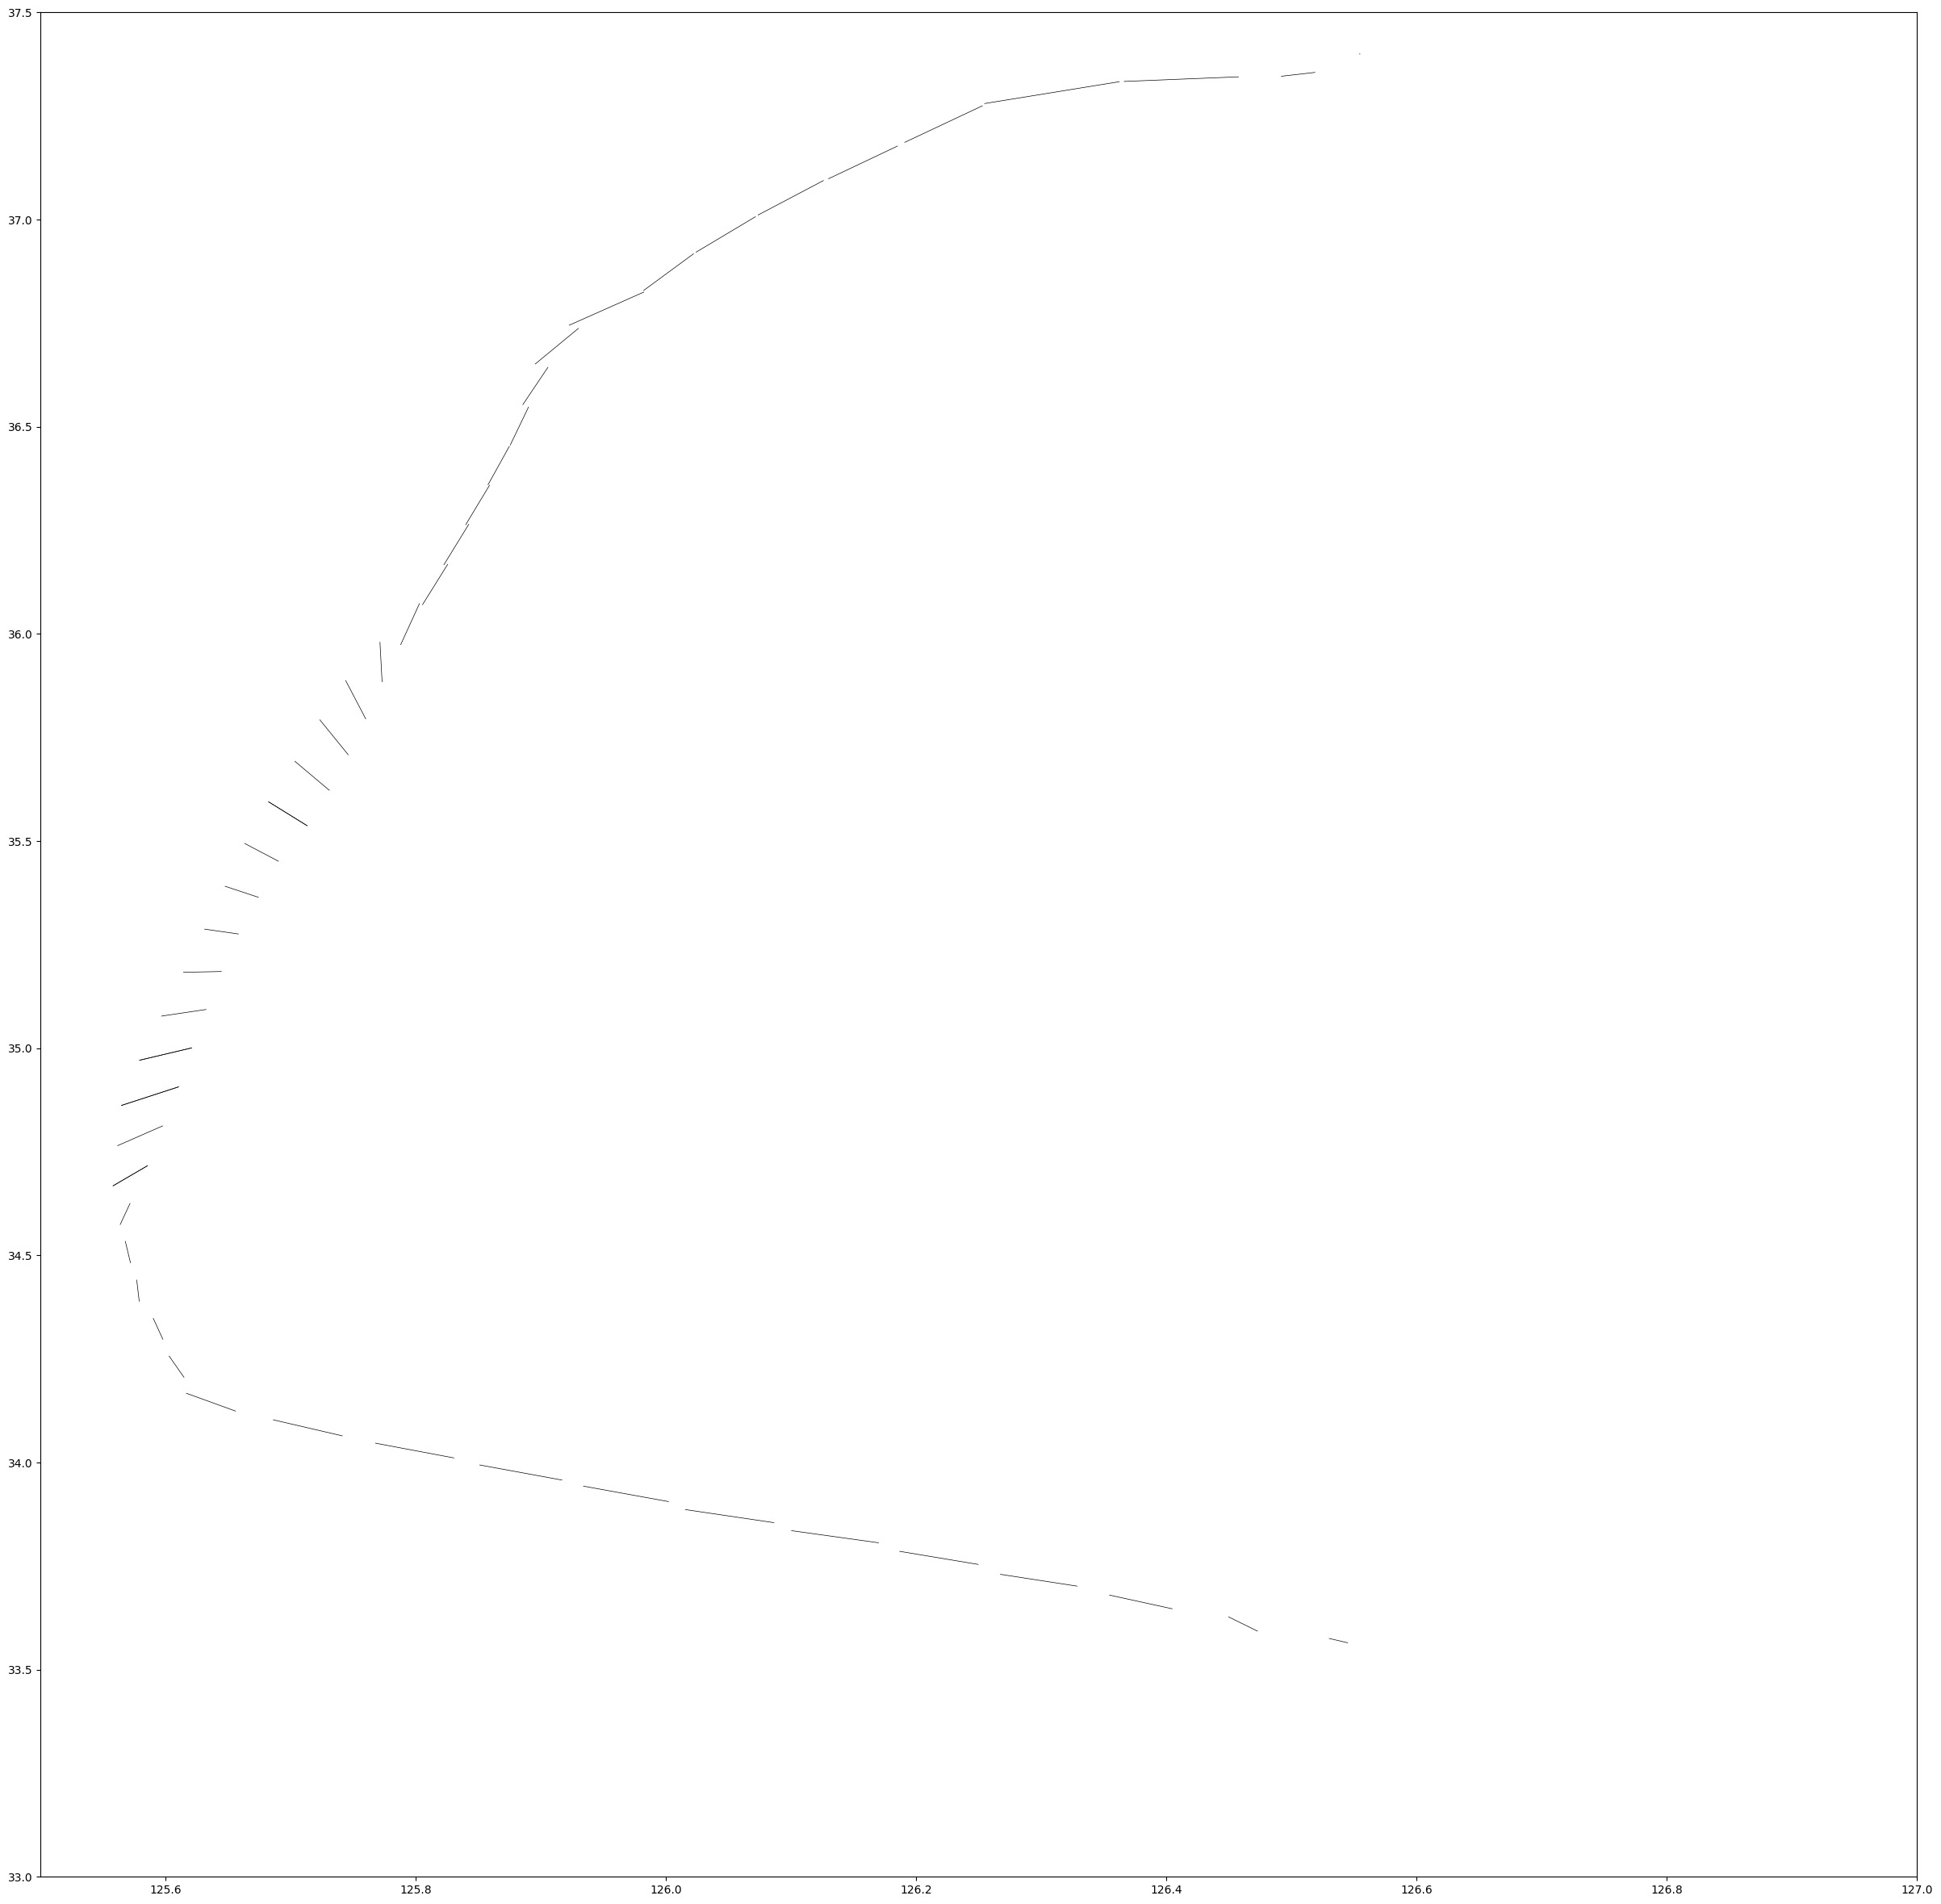

In [61]:
y = t2b.loc[t2b['seq'] == 721,  ['latitude', 'longitude']].to_numpy()
x = t2b.loc[t2b['seq'] == 731,  ['latitude', 'longitude']].to_numpy()

pfg = plt.figure(figsize=(30,30))
# d1=plt.plot(x[:,1],x[:,0])
# plt.setp(d1,color='b',linewidth=2.0)
# d2=plt.plot(y[:,1],y[:,0])
# plt.setp(d2,color='r',linewidth=2.0)

distance, path = fastdtw(x,y , radius=50, dist=euclidean)
print (distance,'\n', path)

index_a,index_b=zip(*path)
for i in index_a:
    if i%100 != 0 : continue
    x1=x[i][0]
    y1=x[i][1]
    x2=y[i][0]
    y2=y[i][1]
    plt.plot([y1, y2], [x1, x2], color='k', linestyle='-', linewidth=0.5, alpha=1)
plt.xlim([125.5, 127])
plt.ylim([33, 37.5])
plt.show()

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

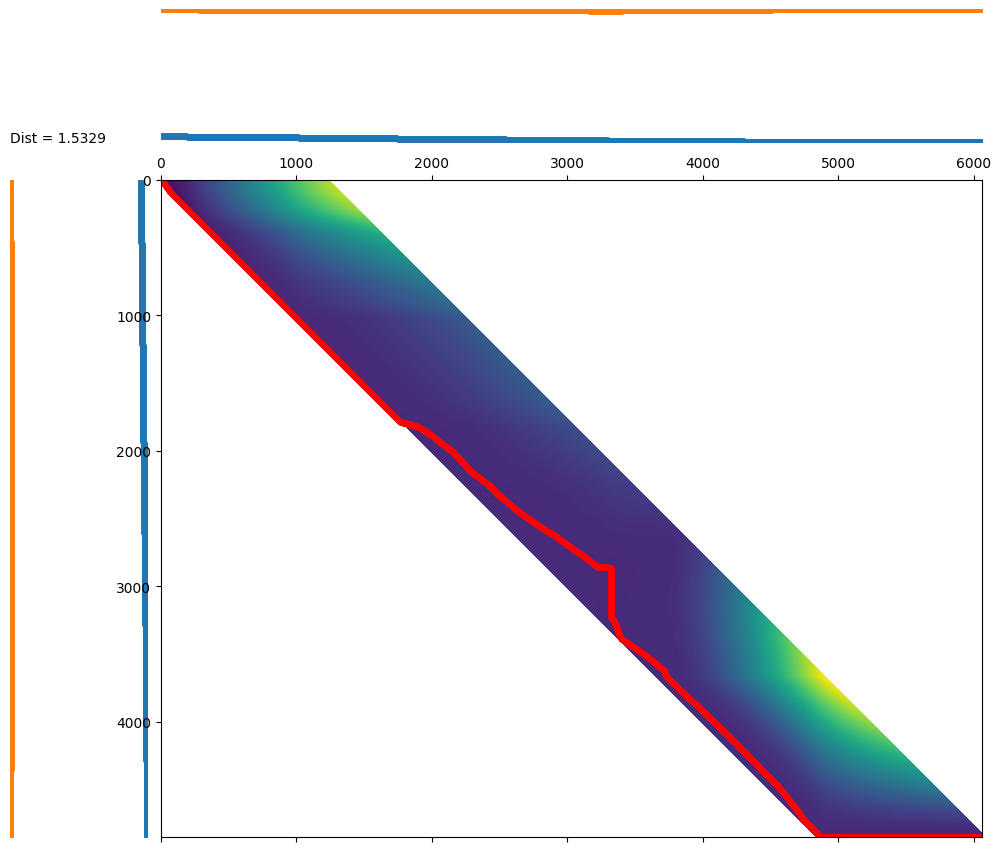

In [60]:
#!pip install dtw-python
#!pip install dtaidistance
from dtw import dtw
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
s2 = t2b.loc[t2b['seq'] == 721,  ['latitude', 'longitude']].to_numpy()
s1 = t2b.loc[t2b['seq'] == 731,  ['latitude', 'longitude']].to_numpy()
d, paths = dtw.warping_paths(s1[:,1], s2[:,1], window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [26]:
with open( "/content/drive/MyDrive/tmTrack/상행선_보간_DataFrame.p", "wb" ) as file:
    pickle.dump(b2t_rsp, file)
with open( "/content/drive/MyDrive/tmTrack/하행선_보간_DataFrame.p", "wb" ) as file:
    pickle.dump(t2b_rsp, file)